# Overview
Our project focuses on analyzing a car dataset to better understand patterns and relationships between different car attributes such as price, model year, engine type, and brand. The main business problem it addresses is identifying the factors that influence car pricing, which can be useful for car dealers, buyers, and manufacturers to make informed decisions.

By analyzing trends, we can gain insights into how car features affect market value.
- How does the brand affect the price?
- What cars can be considered overpriced?
- Price VS. popularity?


# Data
We used the Car Features and MSRP Kaggle dataset scraped from Edmunds (an online resource for automotive info) and Twitter, which has variety of attributes that allows us to analyze both numerical (e.g., price, year, mileage) and categorical (e.g., make, market category, transmission) data.


# Clean and Prepare Data

**Handling missing values** – Identified and removed or imputed missing values to ensure consistency.

**Dealing with duplicates** – Checked for and removed duplicate records to avoid bias in analysis.

**Transforming data types** – Ensured categorical variables like Make and Transmission were properly encoded.

**Feature grouping** – Simplified categorical variables by grouping less frequent brands into an “Other” category to make visualization more meaningful.

**Dummy encoding** – Converted categorical variables such as Make into dummy variables for better analysis and modeling.

**Dropping duplicate features** – Removed columns that did not add value to the analysis (e.g., overly detailed identifiers).

These preprocessing steps helped create a clean, structured dataset suitable for exploratory data analysis (EDA), visualization, and statistical insights.

In the next section, we will perform Exploratory Data Analysis (EDA) to summarize the dataset’s main characteristics, uncover hidden patterns, and highlight the relationships between car attributes such as price, model year, and brand.

## Data Card

In [279]:
# Make                Car Make
# Model               Car Model
# Year                Car Year (Marketing)
# Engine Fuel Type    Engine Fuel Type
# Engine HP           Engine Horse Power (HP)
# Engine Cylinders    Engine Cylinders
# Transmission Type   Transmission Type
# Driven_Wheels       Driven Wheels
# Number of Doors     Number of Doors
# Market Category     Market Category
# Vehicle Size        Size of Vehicle
# Vehicle Style       Type of Vehicle
# highway MPG         Highway MPG
# city mpg            City MPG
# Popularity          Popularity (Twitter)
# MSRP                Manufacturer Suggested Retail Price

## Understand the Data

In [280]:
import pandas as pd
import numpy as np

In [281]:
df = pd.read_csv('data.csv')

In [282]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [284]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [285]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Handling Missing Values

## Engine HP (Horsepower)

- mean = 249, median = 227 → mean > median so the distribution is right_skewed

- std = 109.19 → high variability HP values are widely spread

- Range = 55 → 1001 → extreme outliers exist but its bec exotics cars so its not outliers

Fill missing values with median, as data is skewed

In [286]:
df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)

/tmp/ipython-input-217182256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)


## Engine Cylinders

- mean = 5.63 median = 6.0 → close values

- std = 1.78 → small std so it not vary

- Range = 0 → 16 0-> electric cars , 16 for exotics

Fill missing values with median (6)

In [287]:
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)

/tmp/ipython-input-3427662301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)


## Number of Doors

- mean = 3.43 , median = 4.0, Mode = 4

- std = 0.88 → small var and most of cars has 4 doors

Fill missing values with mode (4) bec its categorical so i cant fill with mean

In [288]:
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)

/tmp/ipython-input-4226697213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)


## Engine Fuel Type  (string)

In [289]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [290]:
df[df['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [291]:
df[df['Model']=='Verona']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11324,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11325,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
11326,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549
11327,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,20549
11328,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20299
11329,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18299


In [292]:
df['Engine Fuel Type'].mode()[0]

'regular unleaded'

In [293]:
# Fill missing values in 'Engine Fuel Type' with the mode Bec it has 3 only missing values
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])

In [294]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,3742


## Market Category
has 31% Missing Data, so it'll be dropped

In [295]:
df.drop('Market Category',axis=1,inplace=True)

## Model Column Handling
`Model` has so many unique values (dropped)


In [296]:
df.drop('Model',axis=1,inplace=True)

In [297]:
df.isnull().sum()

,0
Make,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0
Vehicle Style,0


## Duplicate Values

In [298]:
df.duplicated().sum()

np.int64(729)

In [299]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

         Make  Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
11        BMW  2013  premium unleaded (required)      230.0               6.0   
14        BMW  2013  premium unleaded (required)      230.0               6.0   
17       Audi  1992             regular unleaded      172.0               6.0   
18       Audi  1992             regular unleaded      172.0               6.0   
20       Audi  1992             regular unleaded      172.0               6.0   
...       ...   ...                          ...        ...               ...   
11604   Volvo  2017             regular unleaded      240.0               4.0   
11707  Suzuki  2008             regular unleaded      252.0               6.0   
11708  Suzuki  2008             regular unleaded      252.0               6.0   
11709  Suzuki  2008             regular unleaded      252.0               6.0   
11717  Suzuki  2008             regular unleaded      252.0               6.0   

      Transmission Type    

## Decide Based on Goal
The domain and goal should guide us to what should be done with this large exact duplicates. Since our goal is to predict MSRP, we'll keep only unique rows; duplicates can bias the model.

In [300]:
# remove exact duplicates
df.drop_duplicates(inplace=True)

# Correlataion

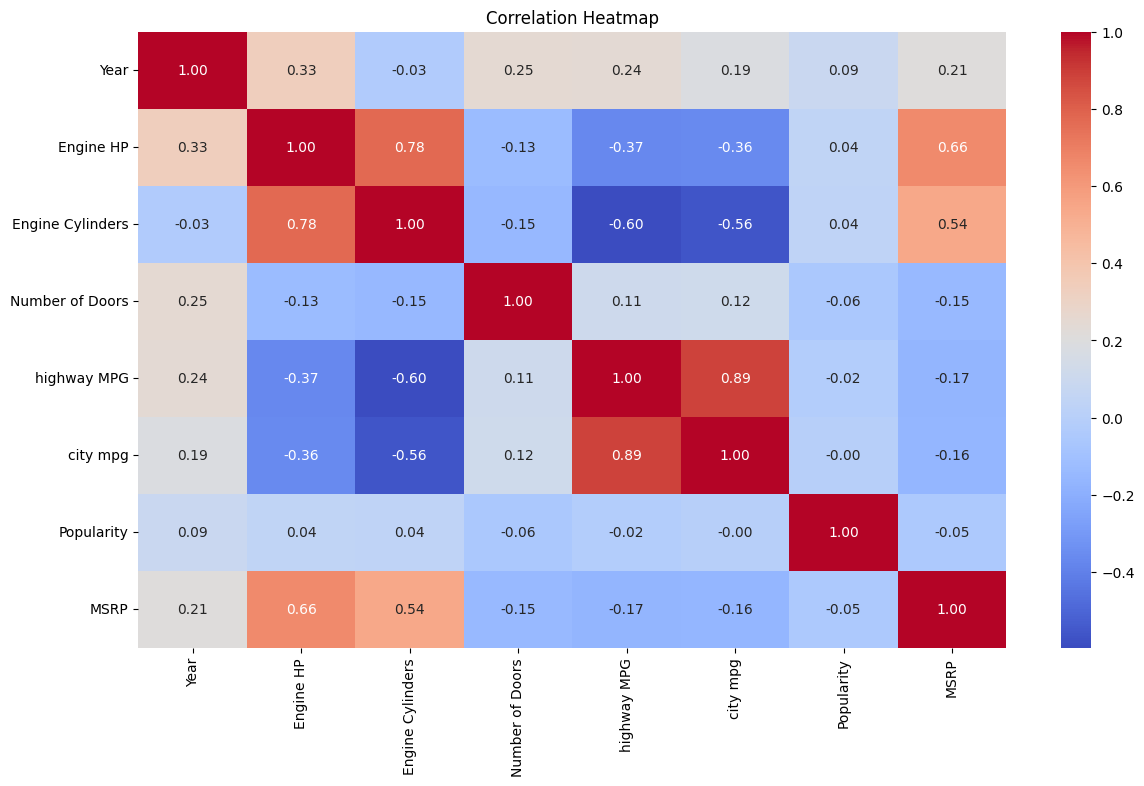

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Hypothesis

## Price vs. Age
We wanted to see if there was a relationship between a cars age (Year) and its price (MSRP) and we discovered that the correlation is positive (0.23) This suggests that **newer cars tend to be more expensive** than older ones though the relationship is **relatively weak**.

## Price vs. HP
We wanted to see if there was a relationship between a cars engine power (Horsepower) and its price (MSRP) and we discovered that the correlation is strongly positive (0.66). This indicates that **cars with higher horsepower generally cost more**.

## Price vs. Popularity

From the heatmap, MSRP and Popularity have a very weak negative correlation (-0.05). This suggests that **high price does not guarantee popularity**, and popular cars are often mid-range or budget-friendly options that balance price, performance, and efficiency.

In [302]:
# bec it has high correlation with city mpg
#MSRP Is affected by Engine HP, Engine Cylinders
#Engine HP Is affected by Engine Cylinders
df.drop('highway MPG',axis=1,inplace=True)

# Outliers

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns to visualize
# num_cols = ["Engine HP", "Engine Cylinders", "highway MPG", "city mpg", "MSRP"]

# plt.figure(figsize=(12, 8))
# for i, col in enumerate(num_cols, 1):
#     plt.subplot(2, 3, i)
#     sns.boxplot(y=df[col])
#     plt.title(f"Boxplot of {col}")

# plt.tight_layout()
# plt.show()

## Engine HP Outliers
Engine HP & MSRP & Cylinders->  Outliers caused by luxury/supercars.

 City MPG -> bad data


### Imputation of outliers
Since the data follows a **roughly normal distribution** (median = 18, mean = 19.73, and standard deviation = 6.7, which indicates **low variation**), we chose to **impute outliers using the mean** value rather than the median.


In [304]:
IQR_OF_CITY_MPG = df['city mpg'].quantile(0.75) - df['city mpg'].quantile(0.25)
Max_CITY_MPG = df['city mpg'].quantile(0.75) + 1.5 * IQR_OF_CITY_MPG
Max_CITY_MPG
df.loc[df["city mpg"] > Max_CITY_MPG, "city mpg"] = df['city mpg'].mean()

/tmp/ipython-input-1790759363.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.735628073312473' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["city mpg"] > Max_CITY_MPG, "city mpg"] = df['city mpg'].mean()


In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Select numerical columns to visualize
# num_cols = ["Engine HP", "Engine Cylinders", "highway MPG", "city mpg", "MSRP"]

# plt.figure(figsize=(12, 8))
# for i, col in enumerate(num_cols, 1):
#     plt.subplot(2, 3, i)
#     sns.boxplot(y=df[col])
#     plt.title(f"Boxplot of {col}")

# plt.tight_layout()
# plt.show()


 # Categorizing Cars as Luxury or Normal

In [306]:

df["Car_Type"] = "Normal"
df.loc[(df["MSRP"] > 100000) | (df["Engine HP"] > 500), "Car_Type"] = "Luxury"
df["Car_Type"].value_counts()

,count
Car_Type,
Normal,10471
Luxury,714


# Extract Clean Data

In [307]:
df.to_csv('cleaned_data.csv', index=False)

# Feature Engineering

In [308]:
df['Driven_Wheels'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [309]:
df['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [310]:
df['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [311]:
Top_15_makes = df['Make'].value_counts().head(15).index
Top_15_makes
# i will keep only the top 15 makes and make the other ones all as others
df['Make'] = df['Make'].apply(lambda x: x if x in Top_15_makes else 'Other')
df.shape

(11185, 14)

In [312]:
# Since it has many categorical features And not Ordinal features, we'll use One-Hot Encoding
df = pd.get_dummies(df, columns=['Car_Type','Make','Engine Fuel Type','Driven_Wheels','Transmission Type', 'Vehicle Size', 'Vehicle Style'], drop_first=True)


In [313]:
pd.set_option('display.max_columns', None)
df.head(10)

,Year,Engine HP,Engine Cylinders,Number of Doors,city mpg,Popularity,MSRP,Car_Type_Normal,Make_BMW,Make_Cadillac,Make_Chevrolet,Make_Dodge,Make_Ford,Make_GMC,Make_Honda,Make_Infiniti,Make_Mazda,Make_Mercedes-Benz,Make_Nissan,Make_Other,Make_Suzuki,Make_Toyota,Make_Volkswagen,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_flex-fuel (unleaded/natural gas),Engine Fuel Type_natural gas,Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_2dr SUV,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Cargo Van,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,19.0,3916,46135,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2011,300.0,6.0,2.0,19.0,3916,40650,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2011,300.0,6.0,2.0,20.0,3916,36350,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,2011,230.0,6.0,2.0,18.0,3916,29450,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,2011,230.0,6.0,2.0,18.0,3916,34500,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
5,2012,230.0,6.0,2.0,18.0,3916,31200,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
6,2012,300.0,6.0,2.0,17.0,3916,44100,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7,2012,300.0,6.0,2.0,20.0,3916,39300,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8,2012,230.0,6.0,2.0,18.0,3916,36900,True,True,False,False,False,False,False,False,False

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11185 entries, 0 to 11913
Data columns (total 56 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           11185 non-null  int64  
 1   Engine HP                                                      11185 non-null  float64
 2   Engine Cylinders                                               11185 non-null  float64
 3   Number of Doors                                                11185 non-null  float64
 4   city mpg                                                       11185 non-null  float64
 5   Popularity                                                     11185 non-null  int64  
 6   MSRP                                                           11185 non-null  int64  
 7   Car_Type_Normal                                                